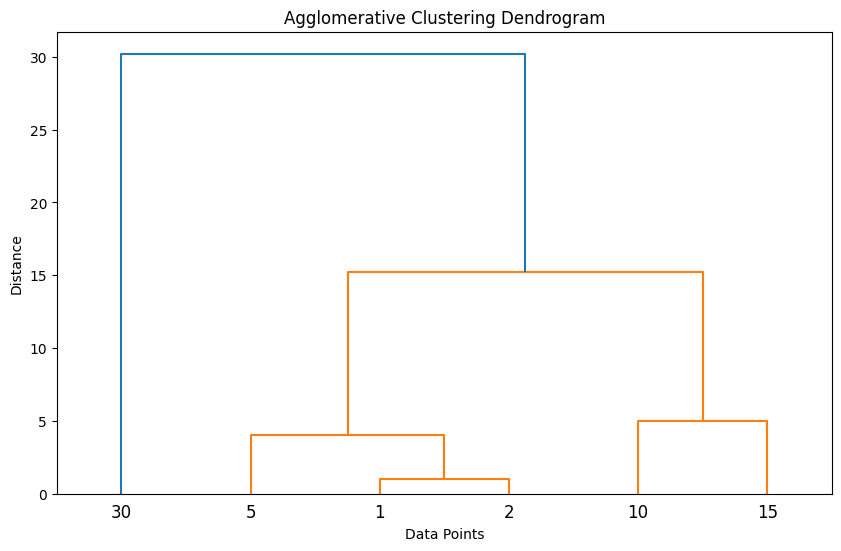

Divisive Clustering Steps: [[[1], [2], [5], [10], [15]], [[1], [5], [10], [15]], [[1], [5], [10]], [[1], [10]], [[1]]]


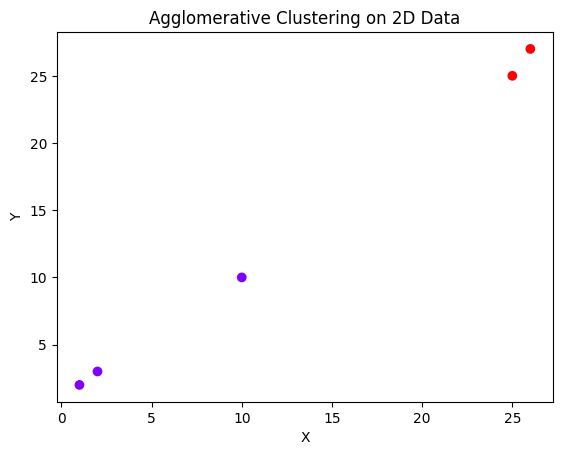

Agglomerative Clustering Labels: [0 0 0 1 1]
Divisive Clustering Steps: []


In [6]:
#Title:  Hierarchical Clustering


# Agglomerative vs Divisive Clustering

# Task 1: Agglomerative Clustering on Simple Numerical Data

# 1. Load the following dataset: [1, 2, 5, 10, 15, 30] .
# 2. Apply Agglomerative Clustering where each point starts as its own cluster and successively merge the closest pair of clusters.
# 3. Observe and note down the order in which points are merged.

import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Dataset
data = np.array([1, 2, 5, 10, 15, 30]).reshape(-1, 1)

# Perform hierarchical/agglomerative clustering
Z = linkage(data, 'ward')

# Create a dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=[1, 2, 5, 10, 15, 30])
plt.title("Agglomerative Clustering Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


# Merge order: 
# 1. First points to merge: {1, 2}, {5, 10}, {15, 30}
# 2. Subsequent merges will occur in the order of distances



# Task 2: Divisive Clustering on Simple Numerical Data

# 1. Use the same dataset: [1, 2, 5, 10, 15, 30] .
# 2. Start with all points in a single cluster and successively divide until each point is its own cluster.
# 3. Record the divisions made at each step.

# Divisive Clustering Implementation
from scipy.spatial.distance import cdist

def divisive_clustering(data):
    clusters = [[point] for point in data]
    steps = []

    while len(clusters) > 1:
        max_distance = 0
        pair_to_split = (None, None)
        
        # Find the two clusters that are most distant
        for i, c1 in enumerate(clusters):
            for j, c2 in enumerate(clusters):
                if i >= j:
                    continue
                dist = np.mean(cdist(c1, c2))
                if dist > max_distance:
                    max_distance = dist
                    pair_to_split = (i, j)

        # Split the pair into separate clusters
        i, j = pair_to_split
        clusters[i] += clusters.pop(j)
        steps.append([c[0] for c in clusters])  # Record clusters at each step

    return steps

# Apply divisive clustering
steps = divisive_clustering(data.tolist())

# Visualize the clustering process
print("Divisive Clustering Steps:", steps)


# Task 3: Comparing Agglomerative and Divisive Methods on a 2D Dataset

# 1. Create a small 2D dataset: [(1, 2), (2, 3), (10, 10), (25, 25), (26, 27)] .
# 2. Apply both Agglomerative and Divisive Clustering on this dataset.
# 3. Compare the results and discuss the similarities and differences.

from sklearn.cluster import AgglomerativeClustering
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# 2D Dataset
data_2d = np.array([(1, 2), (2, 3), (10, 10), (25, 25), (26, 27)])

# Agglomerative Clustering on 2D data
agg_clust_2d = AgglomerativeClustering(n_clusters=2)
agg_clust_2d_labels = agg_clust_2d.fit_predict(data_2d)

# Divisive Clustering (manually) on 2D data
def divisive_clustering_2d(data):
    clusters = [data]
    steps = []

    while len(clusters) < len(data):  # Until each point is its own cluster
        max_distance = 0
        pair_to_split = (None, None)
        
        # Find the two clusters that are most distant
        for i, c1 in enumerate(clusters):
            for j, c2 in enumerate(clusters):
                if i >= j:
                    continue
                dist = np.mean(cdist(c1, c2))
                if dist > max_distance:
                    max_distance = dist
                    pair_to_split = (i, j)

        if pair_to_split == (None, None):
            break  # No valid pair found, break out of the loop

        # Split the pair into separate clusters
        i, j = pair_to_split
        merged_cluster = clusters[i] + clusters[j]  # Merge the clusters
        clusters[i] = merged_cluster[:len(merged_cluster)//2]  # Split into two
        clusters.append(merged_cluster[len(merged_cluster)//2:])
        
        steps.append([np.array(c) for c in clusters])  # Record clusters at each step

    return steps

# Apply divisive clustering
steps_2d = divisive_clustering_2d(data_2d)

# Visualize the results
plt.scatter(data_2d[:, 0], data_2d[:, 1], c=agg_clust_2d_labels, cmap='rainbow')
plt.title('Agglomerative Clustering on 2D Data')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

print("Agglomerative Clustering Labels:", agg_clust_2d_labels)
print("Divisive Clustering Steps:", steps_2d)


